In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("data.txt")

In [3]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [4]:
df = df[(df['Target'] == 'Graduate') | (df['Target'] == 'Dropout')]

In [5]:
df['Target'] = df['Target'].map({'Dropout': 0, 'Graduate': 1})

In [6]:
df.reset_index(inplace=True)

In [7]:
df.drop('index',inplace=True,axis=1)

In [8]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = df.drop('Target',axis=1)
y = df['Target']

In [12]:
scaler = MinMaxScaler()

In [13]:
X_transform = scaler.fit_transform(X)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_transform, y, test_size=0.2, random_state=101)

In [15]:
bestfeatures = SelectKBest(score_func=chi2, k=10)

In [16]:
fit = bestfeatures.fit(X_transform,y)

In [17]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [18]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)

In [19]:
featureScores.columns = ['Specs','Score']

In [20]:
print(featureScores.sort_values(ascending=False,by='Score'))

                                             Specs       Score
18                              Scholarship holder  260.724932
15                                          Debtor  229.692794
31                Curricular units 2nd sem (grade)  214.399992
30             Curricular units 2nd sem (approved)  171.768316
17                                          Gender  151.148802
25                Curricular units 1st sem (grade)  126.200550
16                         Tuition fees up to date   95.006019
24             Curricular units 1st sem (approved)   94.028043
1                                 Application mode   67.006863
19                               Age at enrollment   46.373536
13                                       Displaced   26.035663
0                                   Marital status   14.941084
32  Curricular units 2nd sem (without evaluations)   12.540434
5                           Previous qualification    9.547234
26  Curricular units 1st sem (without evaluations)    6

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import xgboost as xgb

Text(0, 0.5, 'Accuracy Score')

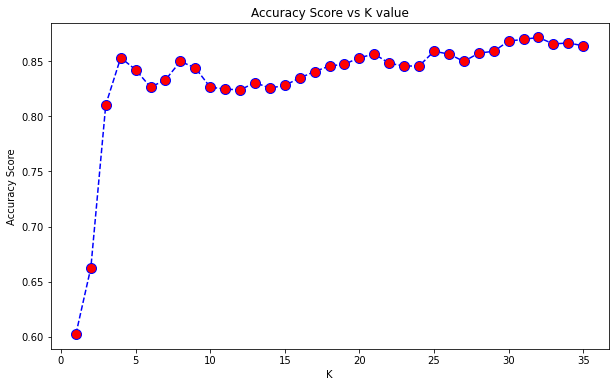

In [22]:
accuracy = []
for i in range(1,36):
    X_new = SelectKBest(chi2, k=i).fit_transform(X_transform, y)
    X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.33, random_state=101)
    new_model = DecisionTreeClassifier()
    new_model.fit(X_train,y_train)
    predictions = new_model.predict(X_test)
    accuracy.append(accuracy_score(y_test,predictions))
plt.figure(figsize=(10,6))
plt.plot(range(1,36),accuracy,color='blue',linestyle='--',marker='o',markerfacecolor='red',markersize=10)
plt.title('Accuracy Score vs K value')
plt.xlabel('K')
plt.ylabel('Accuracy Score')

In [23]:
pd.DataFrame(range(1,36),accuracy)

,0
0.602671,1
0.662771,2
0.810518,3
0.853088,4
0.842237,5
0.826377,6
0.833055,7
0.849750,8
0.843907,9
0.826377,10


In [24]:
X_new = SelectKBest(chi2, k=32).fit_transform(X_transform, y)

In [25]:
X_new.shape

(3630, 32)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=101)

# Buidling Model After Feature Selection

### Logistic Regression

In [27]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
scores.mean()

0.909431212228937

In [28]:
scores.mean()

0.909431212228937

In [29]:
predictions = model.predict(X_test)

In [30]:
print("Accuracy: ", accuracy_score(y_test,predictions))
print("\n")
print(classification_report(y_test,predictions))
print("\n")
print(confusion_matrix(y_test,predictions))

Accuracy:  0.9022038567493113


              precision    recall  f1-score   support

           0       0.92      0.82      0.87       289
           1       0.89      0.95      0.92       437

    accuracy                           0.90       726
   macro avg       0.91      0.89      0.90       726
weighted avg       0.90      0.90      0.90       726



[[238  51]
 [ 20 417]]


### KNN

In [31]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

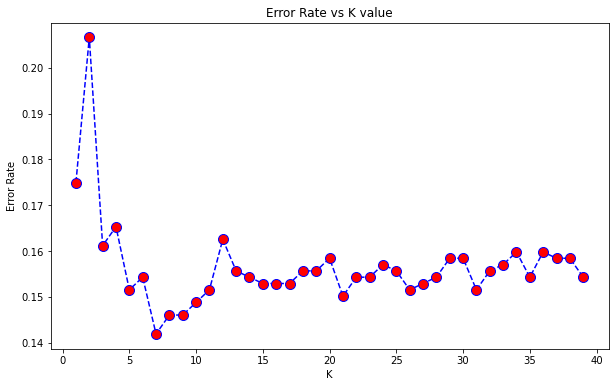

In [32]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='--',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs K value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [33]:
model = KNeighborsClassifier(n_neighbors=11)
model.fit(X_train, y_train)
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
predictions = model.predict(X_test)

In [34]:
print('Accuracy Score:',accuracy_score(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

Accuracy Score: 0.8484848484848485


              precision    recall  f1-score   support

           0       0.92      0.67      0.78       289
           1       0.82      0.96      0.88       437

    accuracy                           0.85       726
   macro avg       0.87      0.82      0.83       726
weighted avg       0.86      0.85      0.84       726



[[195  94]
 [ 16 421]]


In [77]:
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train, y_train)
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
scores.mean()

0.8460753643796659

### Decision Tree

In [36]:
dtree = DecisionTreeClassifier()

In [37]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [38]:
predictions = dtree.predict(X_test)

In [39]:
print("Accuracy: ", accuracy_score(y_test,predictions))
print("\n")
print(classification_report(y_test,predictions))
print("\n")
print(confusion_matrix(y_test,predictions))

Accuracy:  0.849862258953168


              precision    recall  f1-score   support

           0       0.80      0.84      0.82       289
           1       0.89      0.86      0.87       437

    accuracy                           0.85       726
   macro avg       0.84      0.85      0.84       726
weighted avg       0.85      0.85      0.85       726



[[242  47]
 [ 62 375]]


In [40]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
scores.mean()

0.8512335584784928

### Random Forest

In [41]:
rfc = RandomForestClassifier(n_estimators=200)

In [42]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [43]:
predictions = rfc.predict(X_test)

In [44]:
print("Accuracy: ", accuracy_score(y_test,predictions))
print("\n")
print(classification_report(y_test,predictions))
print("\n")
print(confusion_matrix(y_test,predictions))

Accuracy:  0.9022038567493113


              precision    recall  f1-score   support

           0       0.92      0.83      0.87       289
           1       0.89      0.95      0.92       437

    accuracy                           0.90       726
   macro avg       0.91      0.89      0.90       726
weighted avg       0.90      0.90      0.90       726



[[239  50]
 [ 21 416]]


In [45]:
model = RandomForestClassifier(n_estimators=200)
model.fit(X_train, y_train)
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
scores.mean()

0.9090934944898684

### Support Vector Machine

In [46]:
model = SVC()

In [47]:
model.fit(X_train,y_train)

SVC()

In [48]:
predictions = model.predict(X_test)

In [49]:
print("Accuracy: ", accuracy_score(y_test,predictions))
print("\n")
print(classification_report(y_test,predictions))
print("\n")
print(confusion_matrix(y_test,predictions))

Accuracy:  0.8898071625344353


              precision    recall  f1-score   support

           0       0.94      0.78      0.85       289
           1       0.87      0.97      0.91       437

    accuracy                           0.89       726
   macro avg       0.90      0.87      0.88       726
weighted avg       0.89      0.89      0.89       726



[[224  65]
 [ 15 422]]


In [50]:
model = SVC()
model.fit(X_train, y_train)
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
scores.mean()

0.89840976419007

### Grid Search CV

In [51]:
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}

In [52]:
grid = GridSearchCV(SVC(),param_grid,verbose=3)

In [53]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .................................C=0.1, gamma=1; total time=   0.2s
[CV 2/5] END .................................C=0.1, gamma=1; total time=   0.2s
[CV 3/5] END .................................C=0.1, gamma=1; total time=   0.2s
[CV 4/5] END .................................C=0.1, gamma=1; total time=   0.2s
[CV 5/5] END .................................C=0.1, gamma=1; total time=   0.2s
[CV 1/5] END ...............................C=0.1, gamma=0.1; total time=   0.1s
[CV 2/5] END ...............................C=0.1, gamma=0.1; total time=   0.1s
[CV 3/5] END ...............................C=0.1, gamma=0.1; total time=   0.1s
[CV 4/5] END ...............................C=0.1, gamma=0.1; total time=   0.1s
[CV 5/5] END ...............................C=0.1, gamma=0.1; total time=   0.1s
[CV 1/5] END ..............................C=0.1, gamma=0.01; total time=   0.2s
[CV 2/5] END ..............................C=0.

[CV 2/5] END ................................C=1000, gamma=1; total time=   0.1s
[CV 3/5] END ................................C=1000, gamma=1; total time=   0.1s
[CV 4/5] END ................................C=1000, gamma=1; total time=   0.1s
[CV 5/5] END ................................C=1000, gamma=1; total time=   0.1s
[CV 1/5] END ..............................C=1000, gamma=0.1; total time=   0.2s
[CV 2/5] END ..............................C=1000, gamma=0.1; total time=   0.2s
[CV 3/5] END ..............................C=1000, gamma=0.1; total time=   0.2s
[CV 4/5] END ..............................C=1000, gamma=0.1; total time=   0.2s
[CV 5/5] END ..............................C=1000, gamma=0.1; total time=   0.2s
[CV 1/5] END .............................C=1000, gamma=0.01; total time=   0.1s
[CV 2/5] END .............................C=1000, gamma=0.01; total time=   0.1s
[CV 3/5] END .............................C=1000, gamma=0.01; total time=   0.1s
[CV 4/5] END ...............

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [54]:
grid.best_estimator_

SVC(C=100, gamma=0.01)

In [55]:
grid.best_params_

{'C': 100, 'gamma': 0.01}

In [56]:
grid.best_score_

0.9139112113478545

In [57]:
predictions = grid.predict(X_test)

In [58]:
print("Accuracy: ", accuracy_score(y_test,predictions))
print("\n")
print(classification_report(y_test,predictions))
print("\n")
print(confusion_matrix(y_test,predictions))

Accuracy:  0.9022038567493113


              precision    recall  f1-score   support

           0       0.93      0.82      0.87       289
           1       0.89      0.96      0.92       437

    accuracy                           0.90       726
   macro avg       0.91      0.89      0.90       726
weighted avg       0.90      0.90      0.90       726



[[236  53]
 [ 18 419]]


### Naive Bayes

In [59]:
gnb = GaussianNB()

In [60]:
gnb.fit(X_train,y_train)

GaussianNB()

In [61]:
predictions = gnb.predict(X_test)

In [62]:
print('Accuracy Score:',accuracy_score(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

Accuracy Score: 0.8292011019283747


              precision    recall  f1-score   support

           0       0.80      0.76      0.78       289
           1       0.85      0.88      0.86       437

    accuracy                           0.83       726
   macro avg       0.82      0.82      0.82       726
weighted avg       0.83      0.83      0.83       726



[[219  70]
 [ 54 383]]


In [63]:
model = GaussianNB()
model.fit(X_train, y_train)
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
scores.mean()

0.8391918473752815

### XGBoost

In [64]:
xgb_cl = xgb.XGBClassifier()

In [65]:
xgb_cl.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [66]:
predictions = xgb_cl.predict(X_test)

In [67]:
print('Accuracy Score:',accuracy_score(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

Accuracy Score: 0.9008264462809917


              precision    recall  f1-score   support

           0       0.89      0.85      0.87       289
           1       0.90      0.93      0.92       437

    accuracy                           0.90       726
   macro avg       0.90      0.89      0.90       726
weighted avg       0.90      0.90      0.90       726



[[246  43]
 [ 29 408]]


In [68]:
model = xgb.XGBClassifier()
model.fit(X_train, y_train)
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
scores.mean()

0.9083919895722243

### Neural Network

In [69]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [70]:
model = Sequential()

# input layer
model.add(Dense(units=36,activation='relu'))
model.add(Dropout(0.5))

# hidden layer
model.add(Dense(units=18,activation='relu'))
model.add(Dropout(0.5))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# compiler
model.compile(loss='binary_crossentropy', optimizer='adam')

In [71]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [72]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
91/91 [==============================] - 1s 2ms/step - loss: 0.6429 - val_loss: 0.5775
Epoch 2/600
91/91 [==============================] - 0s 1ms/step - loss: 0.5703 - val_loss: 0.4816
Epoch 3/600
91/91 [==============================] - 0s 1ms/step - loss: 0.5037 - val_loss: 0.4013
Epoch 4/600
91/91 [==============================] - 0s 1ms/step - loss: 0.4559 - val_loss: 0.3661
Epoch 5/600
91/91 [==============================] - 0s 1ms/step - loss: 0.4325 - val_loss: 0.3397
Epoch 6/600
91/91 [==============================] - 0s 1ms/step - loss: 0.3991 - val_loss: 0.3245
Epoch 7/600
91/91 [==============================] - 0s 1ms/step - loss: 0.3785 - val_loss: 0.3100
Epoch 8/600
91/91 [==============================] - 0s 1ms/step - loss: 0.3604 - val_loss: 0.3013
Epoch 9/600
91/91 [==============================] - 0s 1ms/step - loss: 0.3501 - val_loss: 0.2962
Epoch 10/600
91/91 [==============================] - 0s 1ms/step - loss: 0.3499 - val_loss: 0.2892
Epoch 11/

<AxesSubplot:>

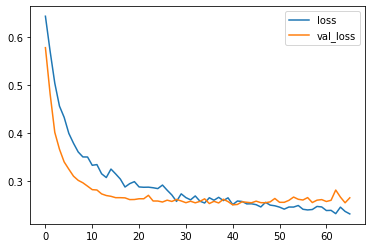

In [73]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [74]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

In [75]:
print('Accuracy Score:',accuracy_score(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

Accuracy Score: 0.9022038567493113


              precision    recall  f1-score   support

           0       0.90      0.85      0.87       289
           1       0.90      0.94      0.92       437

    accuracy                           0.90       726
   macro avg       0.90      0.89      0.90       726
weighted avg       0.90      0.90      0.90       726



[[245  44]
 [ 27 410]]
